In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
RANDOM_STATE=55
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-dataset/heart.csv


In [2]:
df = pd.read_csv("/kaggle/input/heart-disease-dataset/heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
features = [x for x in df.columns if x not in "target"]

In [5]:
features

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [6]:
len(features)

13

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(df[features],df["target"],train_size=0.8,random_state=55)
print("X train size",x_train.shape)
print("y train size",y_train.shape)
print("X validation size",x_val.shape)
print("X validation size",y_val.shape)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


X train size (820, 13)
y train size (820,)
X validation size (205, 13)
X validation size (205,)


In [8]:
min_samples_split_list = [2,10,30,50,100,200,300,400,500,600,700,800]
max_depth_list= [1,2,3,4,8,16,32,64,None]

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

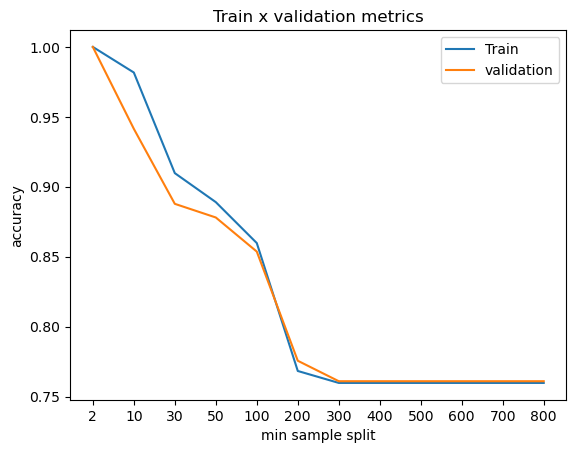

In [10]:
train_accuracy_list = []
val_accuracy_list = []
for min_sample_split in min_samples_split_list:
    model = DecisionTreeClassifier(min_samples_split= min_sample_split, random_state = RANDOM_STATE)
    model.fit(x_train,y_train)
    train_prediction = model.predict(x_train)
    val_prediction = model.predict(x_val)
    train_accuracy_list.append(accuracy_score(train_prediction,y_train))
    val_accuracy_list.append(accuracy_score(val_prediction,y_val))

plt.title("Train x validation metrics")
plt.xlabel("min sample split")
plt.ylabel("accuracy")
plt.xticks(ticks=range(len(min_samples_split_list)), labels=min_samples_split_list)
plt.plot(train_accuracy_list)
plt.plot(val_accuracy_list)
plt.legend(["Train","validation"])

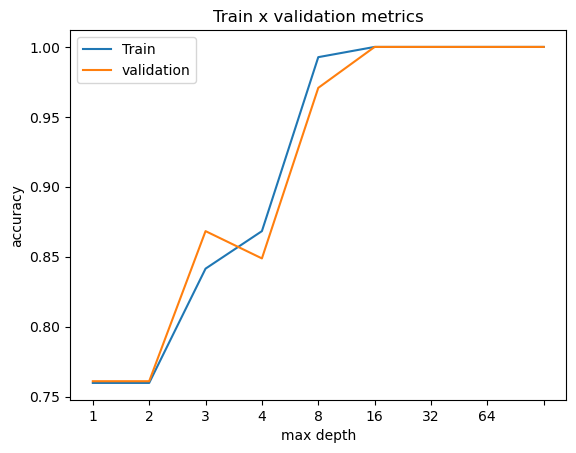

In [11]:
train_accuracy_list = []
val_accuracy_list = []
for max_depth in max_depth_list:
    model = DecisionTreeClassifier(max_depth= max_depth, random_state = RANDOM_STATE)
    model.fit(x_train,y_train)
    train_prediction = model.predict(x_train)
    val_prediction = model.predict(x_val)
    train_accuracy_list.append(accuracy_score(train_prediction,y_train))
    val_accuracy_list.append(accuracy_score(val_prediction,y_val))

plt.title("Train x validation metrics")
plt.xlabel("max depth")
plt.ylabel("accuracy")
plt.xticks(ticks=range(len(max_depth_list)), labels=max_depth_list)
plt.plot(train_accuracy_list)
plt.plot(val_accuracy_list)
plt.legend(["Train","validation"])

In [12]:
model = DecisionTreeClassifier(min_samples_split=100,max_depth= 5, random_state = 55)
model.fit(x_train,y_train)
train_prediction = model.predict(x_train)
val_prediction = model.predict(x_val)
print(accuracy_score(train_prediction,y_train))
print(accuracy_score(val_prediction,y_val))

0.8597560975609756
0.8536585365853658


### **Random Forest**

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
min_samples_split_list = [2,10,30,50,100,300,700,800]
max_depth_list = [2,4,8,16,32,64,None]
n_estimaters_list = [10,50,100,500]

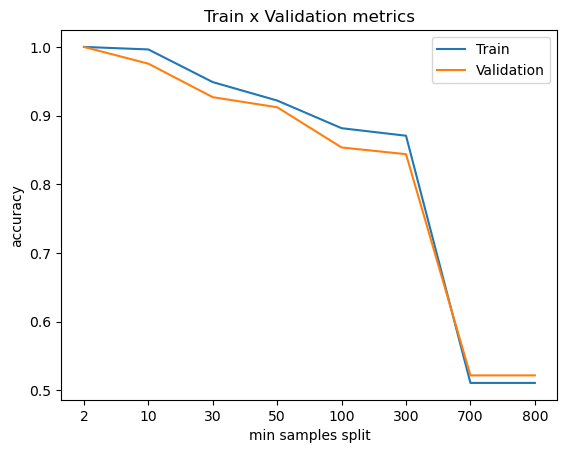

In [15]:
accuracy_list_train = []
accuracy_list_val = []

for min_samples_split in min_samples_split_list:
    model = RandomForestClassifier(min_samples_split=min_samples_split,random_state=RANDOM_STATE)
    model.fit(x_train,y_train)
    predictions_train = model.predict(x_train)
    predictions_val = model.predict(x_val)
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)
plt.title("Train x Validation metrics")
plt.xlabel("min samples split")
plt.ylabel("accuracy")
plt.xticks(ticks=range(len(min_samples_split_list)),labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(["Train","Validation"])

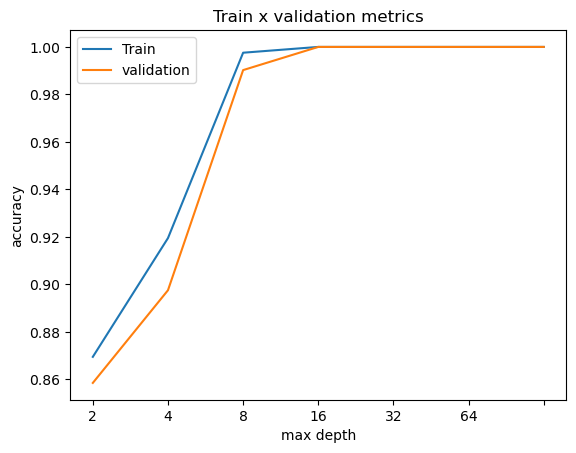

In [16]:
train_accuracy_list = []
val_accuracy_list = []
for max_depth in max_depth_list:
    model = RandomForestClassifier(max_depth= max_depth, random_state = RANDOM_STATE)
    model.fit(x_train,y_train)
    train_prediction = model.predict(x_train)
    val_prediction = model.predict(x_val)
    train_accuracy_list.append(accuracy_score(train_prediction,y_train))
    val_accuracy_list.append(accuracy_score(val_prediction,y_val))

plt.title("Train x validation metrics")
plt.xlabel("max depth")
plt.ylabel("accuracy")
plt.xticks(ticks=range(len(max_depth_list)), labels=max_depth_list)
plt.plot(train_accuracy_list)
plt.plot(val_accuracy_list)
plt.legend(["Train","validation"])

[1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0]


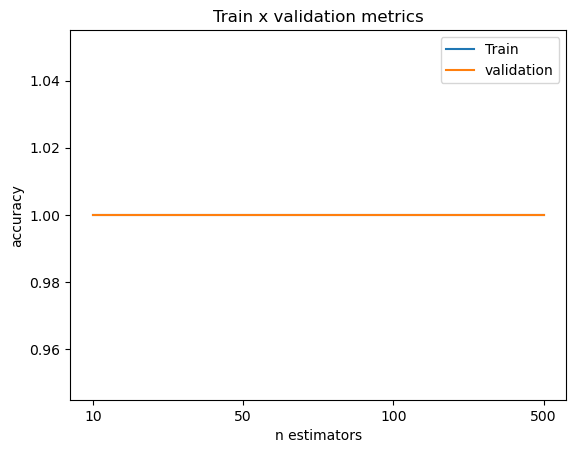

In [17]:
train_accuracy_list = []
val_accuracy_list = []
for n_estimater in n_estimaters_list:
    model = RandomForestClassifier(n_estimators= n_estimater, random_state = RANDOM_STATE)
    model.fit(x_train,y_train)
    train_prediction = model.predict(x_train)
    val_prediction = model.predict(x_val)
    train_accuracy_list.append(accuracy_score(train_prediction,y_train))
    val_accuracy_list.append(accuracy_score(val_prediction,y_val))

plt.title("Train x validation metrics")
plt.xlabel("n estimators")
plt.ylabel("accuracy")
plt.xticks(ticks=range(len(n_estimaters_list)), labels=n_estimaters_list)
plt.plot(train_accuracy_list)
plt.plot(val_accuracy_list)
plt.legend(["Train","validation"])
print(train_accuracy_list)
print(val_accuracy_list)

In [18]:
random_fores_model = RandomForestClassifier(n_estimators=100,max_depth=16,min_samples_split=50)
random_fores_model.fit(x_train,y_train)
print("Train Accuracy",accuracy_score(random_fores_model.predict(x_train),y_train))
print("Validation Accuracy",accuracy_score(random_fores_model.predict(x_val),y_val))

Train Accuracy 0.9085365853658537
Validation Accuracy 0.8731707317073171


### **XGBoost** 

In [19]:
from xgboost import XGBClassifier

In [20]:
xgb_model  = XGBClassifier(n_estimators=500,learning_rate=0.1,verbosity=1,random_state=RANDOM_STATE)
xgb_model.fit(x_train,y_train,eval_set=[(x_val,y_val)],early_stopping_rounds=10)

[0]	validation_0-logloss:0.62410
[1]	validation_0-logloss:0.56344
[2]	validation_0-logloss:0.51742
[3]	validation_0-logloss:0.47369
[4]	validation_0-logloss:0.43976
[5]	validation_0-logloss:0.40536
[6]	validation_0-logloss:0.37788
[7]	validation_0-logloss:0.35420
[8]	validation_0-logloss:0.33322
[9]	validation_0-logloss:0.31085
[10]	validation_0-logloss:0.29476
[11]	validation_0-logloss:0.27547
[12]	validation_0-logloss:0.26217
[13]	validation_0-logloss:0.24938
[14]	validation_0-logloss:0.23830
[15]	validation_0-logloss:0.22464
[16]	validation_0-logloss:0.21575
[17]	validation_0-logloss:0.20616
[18]	validation_0-logloss:0.19469
[19]	validation_0-logloss:0.18293
[20]	validation_0-logloss:0.17431
[21]	validation_0-logloss:0.16400
[22]	validation_0-logloss:0.15456
[23]	validation_0-logloss:0.14839
[24]	validation_0-logloss:0.14061
[25]	validation_0-logloss:0.13481
[26]	validation_0-logloss:0.12817
[27]	validation_0-logloss:0.12215
[28]	validation_0-logloss:0.11659
[29]	validation_0-loglos

/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[45]	validation_0-logloss:0.06738
[46]	validation_0-logloss:0.06553
[47]	validation_0-logloss:0.06332
[48]	validation_0-logloss:0.06114
[49]	validation_0-logloss:0.05983
[50]	validation_0-logloss:0.05875
[51]	validation_0-logloss:0.05679
[52]	validation_0-logloss:0.05518
[53]	validation_0-logloss:0.05398
[54]	validation_0-logloss:0.05256
[55]	validation_0-logloss:0.05159
[56]	validation_0-logloss:0.05056
[57]	validation_0-logloss:0.04956
[58]	validation_0-logloss:0.04827
[59]	validation_0-logloss:0.04738
[60]	validation_0-logloss:0.04669
[61]	validation_0-logloss:0.04539
[62]	validation_0-logloss:0.04423
[63]	validation_0-logloss:0.04349
[64]	validation_0-logloss:0.04255
[65]	validation_0-logloss:0.04183
[66]	validation_0-logloss:0.04115
[67]	validation_0-logloss:0.04019
[68]	validation_0-logloss:0.03969
[69]	validation_0-logloss:0.03907
[70]	validation_0-logloss:0.03824
[71]	validation_0-logloss:0.03773
[72]	validation_0-logloss:0.03723
[73]	validation_0-logloss:0.03652
[74]	validatio

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=55, ...)

In [21]:
xgb_model.best_iteration

497

In [22]:
print("Train set accuracy",accuracy_score(xgb_model.predict(x_train),y_train))
print("Validation set accuracy",accuracy_score(xgb_model.predict(x_val),y_val))

Train set accuracy 1.0
Validation set accuracy 1.0


In [23]:
print(xgb_model.predict(x_val.tail()))
print(y_val.tail())


[0 0 1 0 1]
546    0
554    0
922    1
593    0
870    1
Name: target, dtype: int64
